In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Import the dataset and understand it.

In [3]:
df = pd.read_csv('loan.csv')

In [4]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,4 years,...,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,3 years,...,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,< 1 year,...,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,< 1 year,...,other,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00,NaN,NaN


2. List down the number of rows and columns.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  float64
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

3. ‘Int_rate’ column is character type. With the help of lambda function
convert into float type.


In [13]:
df["int_rate"]=df["int_rate"].apply(lambda x: float (x.strip("%")))

In [14]:
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

4. Check the datatype of each column.

In [11]:
df.dtypes

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
emp_length              object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_d            object
last_pymnt_amnt        float64
Unnamed: 21            float64
Unnamed: 22            float64
dtype: object

5. Cleaning the dataset- Remove the columns having complete NaN value in
the entire dataset.


In [9]:
df1 = df.dropna(axis = 1, thresh = 1)
df1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,4 years,...,Not Verified,Fully Paid,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,3 years,...,Not Verified,Fully Paid,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,< 1 year,...,Not Verified,Fully Paid,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,< 1 year,...,Not Verified,Fully Paid,other,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00


6. Write the code to find the value counts of the ‘loan_status’ category
column and filter only the ‘fully paid’ and ‘charged off’ categories

In [21]:
df2= df[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off')]
df2['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 38577, dtype: object

7. Filter the ‘Emp_Len’ column to extract the numerical value from the
string.

In [5]:
df["emp_length"]=df["emp_length"].str.extract(r'(\d+)').astype(float)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10.0,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,1.0,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10.0,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10.0,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1.0,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,4.0,...,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,3.0,...,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,1.0,...,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,1.0,...,other,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00,NaN,NaN


8. Using the Lambda function, remove the month from the ‘term’ column
such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.

In [10]:
df['term']=df['term'].apply(lambda x : x.strip('months'))
df['term']

0         36 
1         60 
2         36 
3         36 
4         60 
         ... 
39712     36 
39713     36 
39714     36 
39715     36 
39716     36 
Name: term, Length: 39717, dtype: object

9. Create a new column as risky_loan_applicant by comparing loan_amnt
and funded_amnt with the following criteria -
If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as
‘1’

In [11]:
df['risky_loan_applicant']=None

In [12]:
df['risky_loan_applicant']=df.apply(lambda x: 1 if x['loan_amnt'] > x['funded_amnt'] else 0, axis=1)

10. Using the bar plot visualize the loan_status column against categorical
column grade, term, verification_status . Write the observation from
each graph.


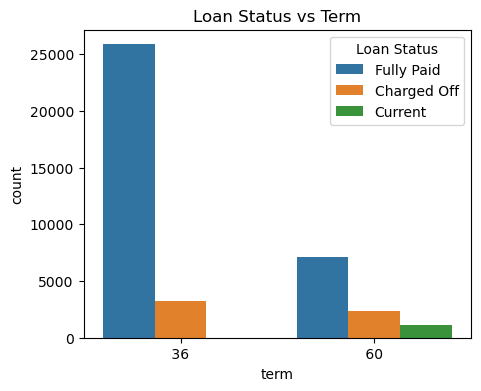

In [29]:
# for loan_status and term
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='term', hue='loan_status')
plt.title('Loan Status vs Term')
plt.legend(title='Loan Status')
plt.show()


observations

Loan Status vs Term:

Loans with a term of '36 months' have a higher proportion of 'Fully paid' loans compared to '60 months'.

The number of 'Fully Paid' loans is higher for both term options.

Loans with term '60 months' have loans which are in 'current' condition

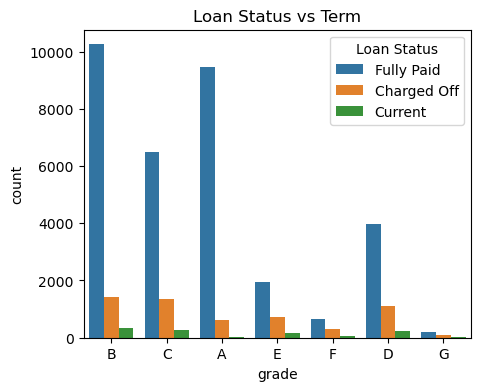

In [30]:
# for loan_status and grade
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='grade', hue='loan_status')
plt.title('Loan Status vs Term')
plt.legend(title='Loan Status')
plt.show()

observations
Loan Status vs Grade:

Grade 'B' has the highest number of 'Charged Off' loans compared to other grades.

Grade 'B' has the highest number of 'Fully Paid' loans folled by Grade 'A'.



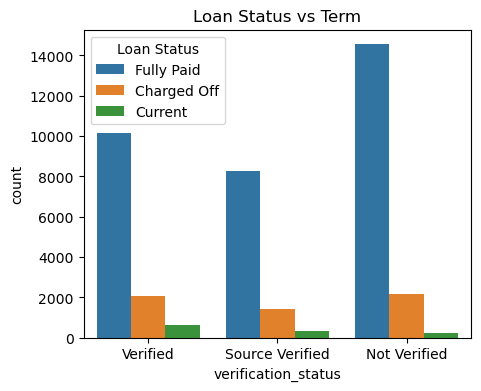

In [31]:
# for loan_status and verification_status
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='verification_status', hue='loan_status')
plt.title('Loan Status vs Term')
plt.legend(title='Loan Status')
plt.show()

observations

Loan Status vs Verification Status:

Loans with 'Not Verified' verification status have a higher proportion of 'Fully Paid' loans.

Loans with 'Verified' verification status have higher 'charged off' and 'current' loan status.

Loans with 'Not Verified' verification status have lowest 'current' loan status


11.Using a user defined function convert the ‘emp_len’ column into categorical column as follows -

 If emp_len is less than equals to 1 then recode as ‘fresher’. 
 
 If emp_len is greater than 1 and less than 3 then recode as ‘junior’. 
 
 If emp_len is greater than 3 and less than 7 then recode as ‘senior’ 
 
 If emp_len is greater than 7 then recode as ‘expert’.

In [6]:
def cate(emp_length):
    if emp_length <= 1:
        return "fresher"
    elif 1 < emp_length <3:
        return "junior"
    elif 3< emp_length <7:
        return "senior"
    else:
        return "expert"

In [7]:
df['emp_length']

0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 39717, dtype: float64

12.Find the sum of ‘loan_amnt’ for each grade and display the distribution
of ‘loan_amnt’ using a pie plot

In [11]:
s = df.groupby('grade')['loan_amnt'].sum()
s

grade
A     86982400
B    133651350
C     89115825
D     65160400
E     45037900
F     19263100
G      6391675
Name: loan_amnt, dtype: int64

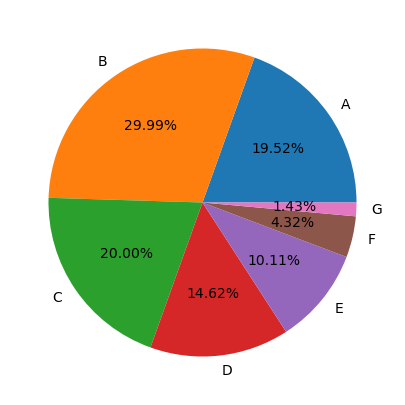

In [12]:
plt.figure(figsize=(8,5))
plt.pie(s,labels=s.index,autopct="%.2f%%")
plt.show()

13. What is the relationship between loan amount and interest rate?

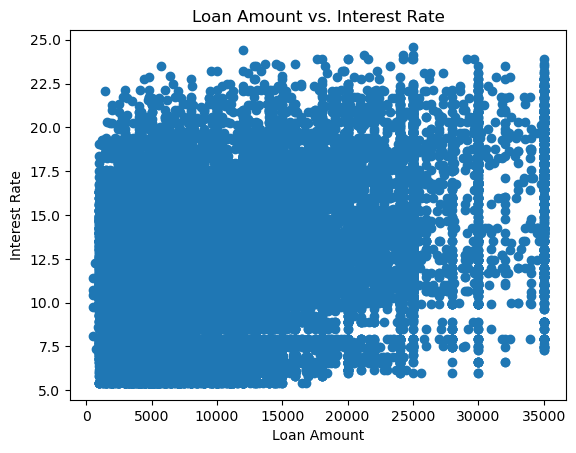

In [15]:
plt.scatter(df['loan_amnt'], df['int_rate'])
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.title('Loan Amount vs. Interest Rate')
plt.show()


14.What is the highest interest rate in the dataset?

In [23]:
interest_rates =df['int_rate']
highest_interest_rate = df['int_rate'].max
print("Highest Interest Rate:", highest_interest_rate)

Highest Interest Rate: <bound method NDFrame._add_numeric_operations.<locals>.max of 0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64>


15.What is the average loan amount funded across all loans?

In [22]:
loan_amounts = df['loan_amnt']
average_loan_amount = np.mean(df['loan_amnt'])
print("Average Loan Amount:", average_loan_amount)


Average Loan Amount: 11219.443814991062


16. How does the distribution of loan amounts look?

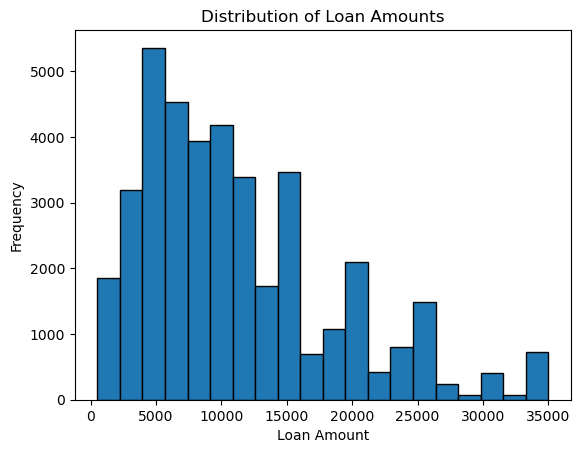

In [24]:
plt.hist(df['loan_amnt'], bins=20, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

17.How many loans were taken for different loan purposes?

In [26]:
loan_purposes_count = df['purpose'].value_counts()
print("Loan Purposes Count:\n", loan_purposes_count)

Loan Purposes Count:
 debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64
